In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_14126/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
class MyLinnearRegressor:

    def __init__(self) -> None:
        self.W = []
        
    def train(self, input_set, output_set, learning_rate=0.001, noEpochs=100):
        X = [[1] + line for line in input_set]
        m = len(X[0])
        for i in range(m):
            self.W.append(np.random.random())

        for _ in range(noEpochs):
            errors = []
            for i in range(m):
                errors.append(0.0)

            for input_line, output_line in zip(X, output_set):

                prediction = sum(input_line[j] * self.W[j] for j in range(m))
                error = output_line - prediction

                for j in range(m):
                    errors[j] += error * input_line[j]

            for j in range(m):
                self.W[j] += learning_rate * errors[j] / len(input_set)

    def predict(self, input_set):
        X = [[1] + line for line in input_set]
        output_set = []
        for line in X:
            output_set.append(sum([w*v for w,v in zip(self.W,line)]))
        return output_set

In [12]:
from sklearn.preprocessing import normalize
def read_data(filePath: str):
    df = pd.read_csv(filePath)
    df = df.dropna()
    df['Happiness.Score'] = normalize([df['Happiness.Score']])[0]
    df['Economy..GDP.per.Capita.'] = normalize([df['Economy..GDP.per.Capita.']])[0]
    df['Freedom'] = normalize([df['Freedom']])[0]

    return df

## Happiness by GDP

In [13]:
def seeDataDistribution1(df_world_happiness):
    fig,axes = plt.subplots(nrows=2,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    plt.show()

def plotData1(df_world_happiness):
    fig,axes = plt.subplots()

    axes.plot(df_world_happiness["Economy..GDP.per.Capita."],df_world_happiness["Happiness.Score"], 'ro') 
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between GDP and Happiness')
    plt.show()

def getTrainingAndValidationSet1(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationData1(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSet1(df_world_happiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')   #train data are plotted by red and circle sign
    plt.plot(validationInputSet, validationOutputSet, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
    axes.set_title("train and validation data")
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    plt.legend()
    plt.show()

def getErrors(computedOutputValues, groundTruthValues):
    err = 0.0
    for cov,gtv in zip(computedOutputValues, groundTruthValues):
        err = (gtv - cov)**2
    err /= len(computedOutputValues)
    return err

In [14]:
world_happiness = read_data('datas/2017.csv')

<h4>See data distribution</h4>

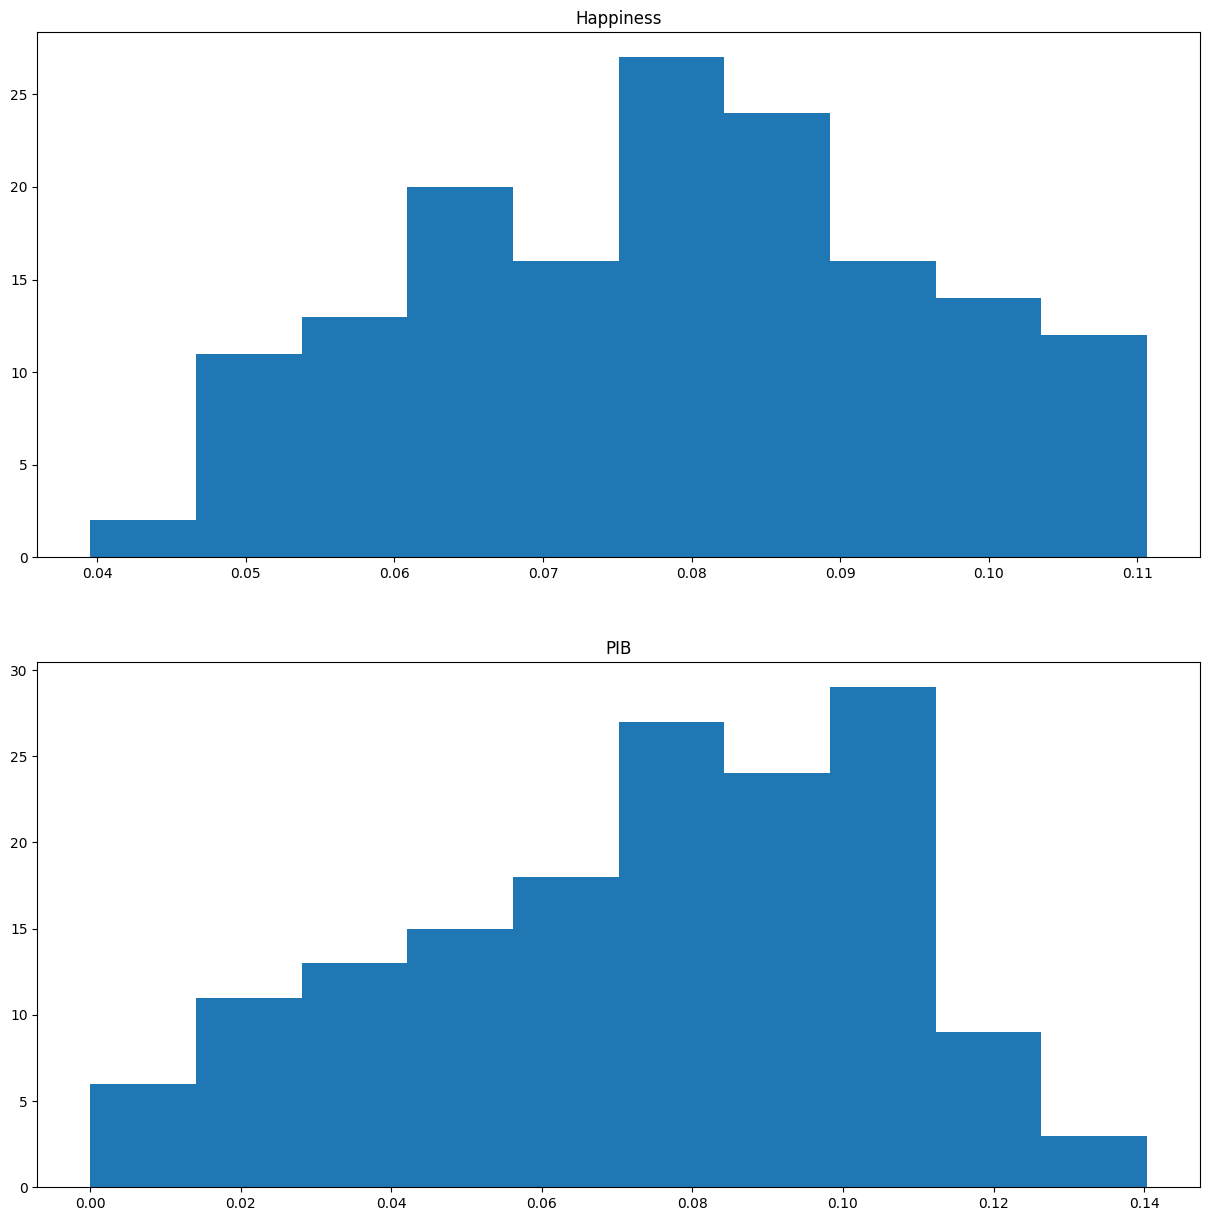

In [15]:
seeDataDistribution1(world_happiness)

<h4>See data plot</h4>

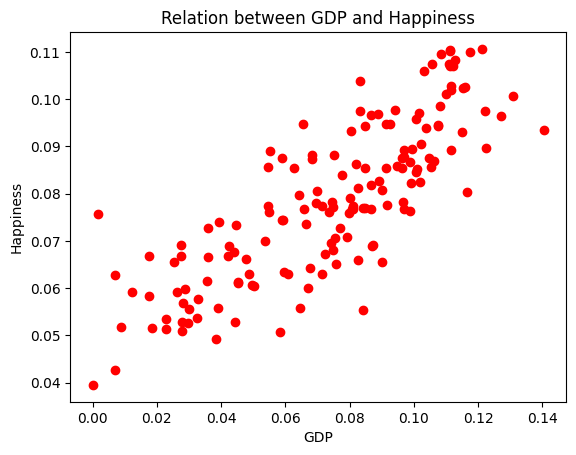

In [16]:
plotData1(world_happiness)

<h4>See training and validation data</h4>

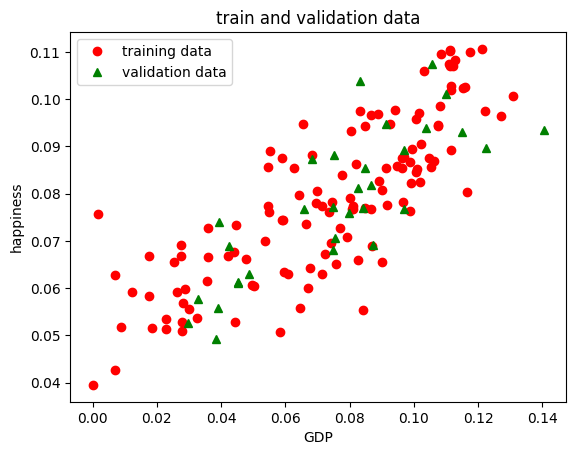

In [17]:
plotTrainingAndValidationData1(world_happiness)

<h3>Using tool</h3>

In [18]:
from sklearn.linear_model import LinearRegression

def getRegressorTool1(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSet1(df_world_happiness)
    xx = [[el] for el in trainingInputSet]

    regressor = LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor

def plotToolRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputValues, validationOutputValues = getTrainingAndValidationSet1(df_world_happiness)
    regressor = getRegressorTool1(df_world_happiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]

    print("f(x) = {} + {}*x".format(w0,w1))

    v = [[el] for el in validationInputValues]
    computedOutputvalues = regressor.predict(v)
    err = getErrors(computedOutputvalues, validationOutputValues)
    print("Eroare: {}".format(err))

    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()

f(x) = 0.047199701850182116 + 0.4199775092730571*x
Eroare: 9.826639591682033e-07


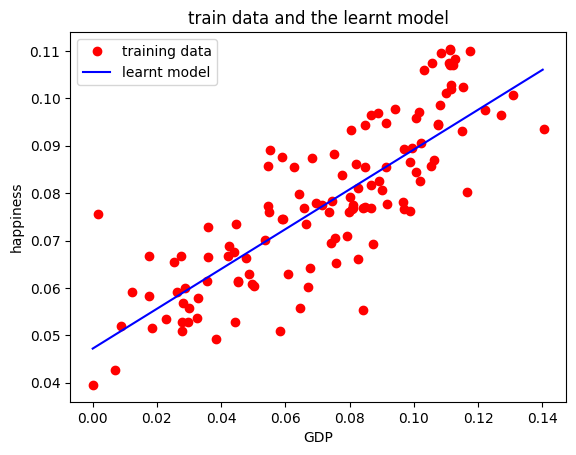

In [19]:
plotToolRegressor(world_happiness)

<h3>Using my regressor</h3>

In [20]:


def getRegressorMyRegressor1(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSet1(df_world_happiness)
    xx = [[el] for el in trainingInputSet]

    regressor = MyLinnearRegressor()
    regressor.train(xx, trainingOutputSet,noEpochs=10000)

    return regressor


def plotMyRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputValues, validationOutputValues = getTrainingAndValidationSet1(df_world_happiness)
    regressor = getRegressorMyRegressor1(df_world_happiness)
    w0, w1 = regressor.W[0], regressor.W[1]

    print("f(x) = {} + {}*x".format(w0,w1))

    v = [[el] for el in validationInputValues]
    computedOutputvalues = regressor.predict(v)
    err = getErrors(computedOutputvalues, validationOutputValues)
    print("Eroare: {}".format(err))

    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()

f(x) = 0.029410088365705966 + 0.6641916162520966*x
Eroare: 3.23127973518414e-07


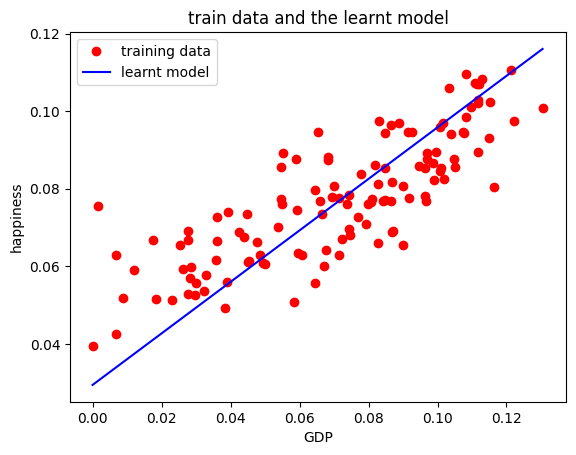

In [21]:
plotMyRegressor(world_happiness)

## Happiness by GDP and Freedom

In [22]:
def seeDataDistribution2(df_world_happiness):
    fig,axes = plt.subplots(nrows=3,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")

    axes[2].hist(df_world_happiness["Freedom"])
    axes[2].set_title("Freedom")
    plt.show()

def plotData2(df_world_happiness):
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')

    axes.scatter(df_world_happiness["Economy..GDP.per.Capita."],df_world_happiness["Freedom"],df_world_happiness["Happiness.Score"])
    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()

def getTrainingAndValidationSet2(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [[df_world_happiness["Economy..GDP.per.Capita."].iloc[index], df_world_happiness["Freedom"].iloc[index]] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [[df_world_happiness["Economy..GDP.per.Capita."].iloc[index],df_world_happiness["Freedom"].iloc[index]] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationSet2(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSet2(df_world_happiness)
    axes  = plt.figure().add_subplot(projection='3d')

    xTraining = [point[0] for point in trainingInputSet]
    yTraining = [point[1] for point in trainingInputSet]

    xValidation = [point[0] for point in validationInputSet]
    yValidation = [point[1] for point in validationInputSet]

    axes.scatter(xTraining,yTraining,trainingOutputSet)
    axes.scatter(xValidation,yValidation,validationOutputSet)
    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()

<h4>See data distribution</h4>

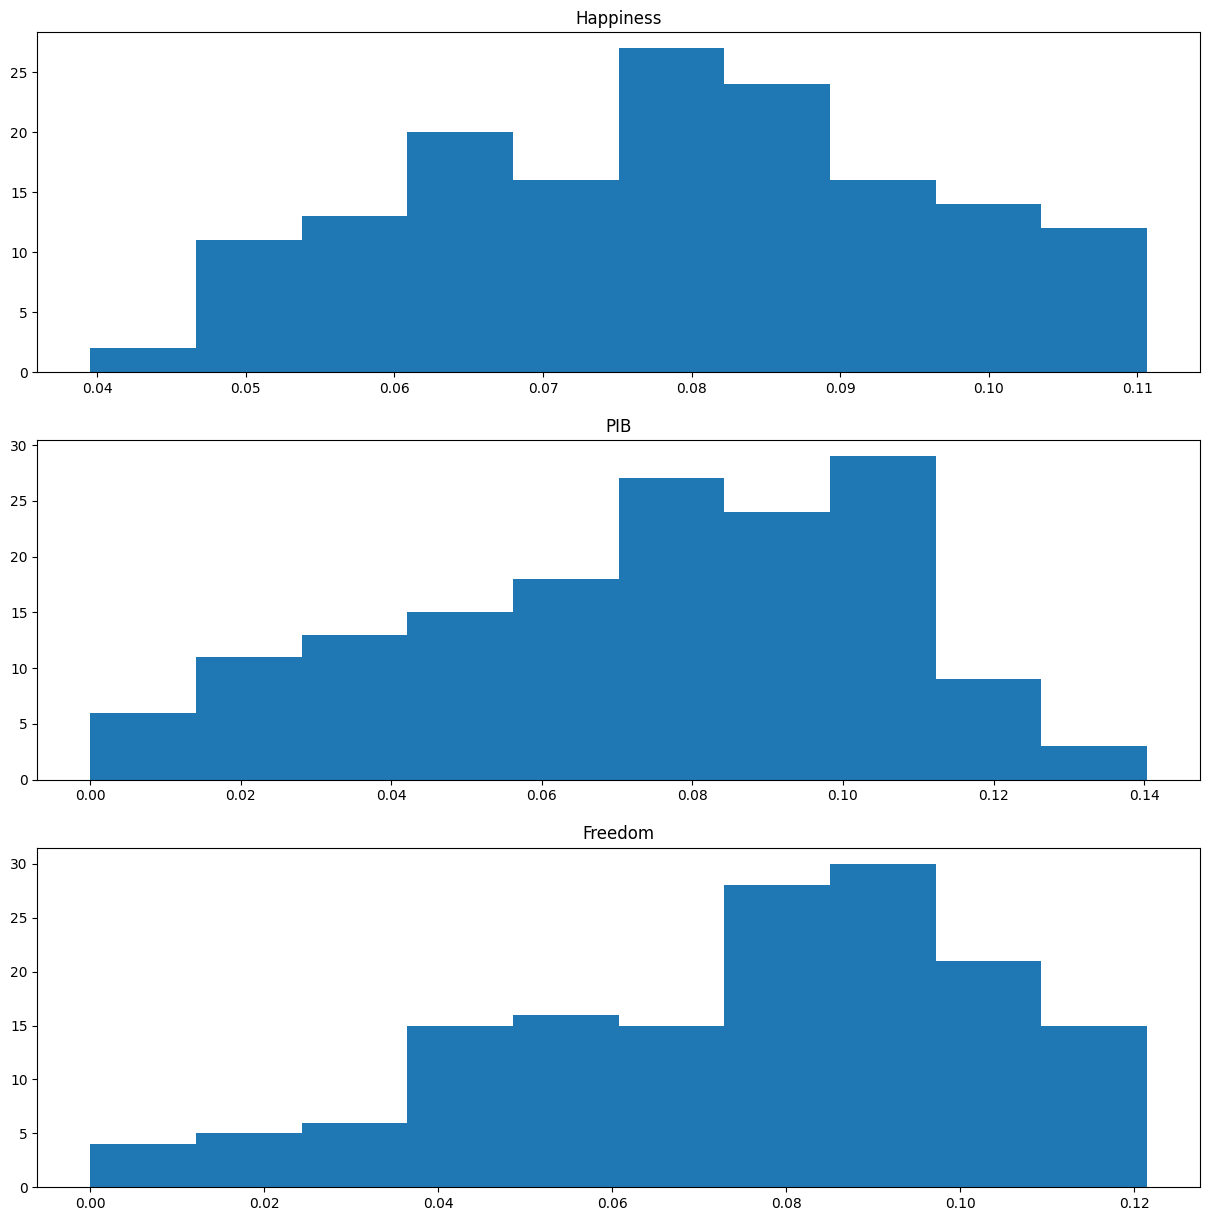

In [23]:
seeDataDistribution2(world_happiness)

<h4>See data plot</h4>

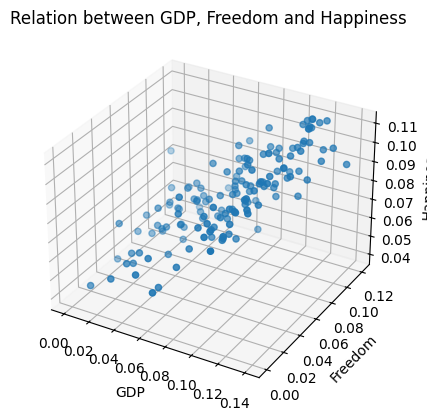

In [24]:
plotData2(world_happiness)

<h4>See training and validation data</h4>

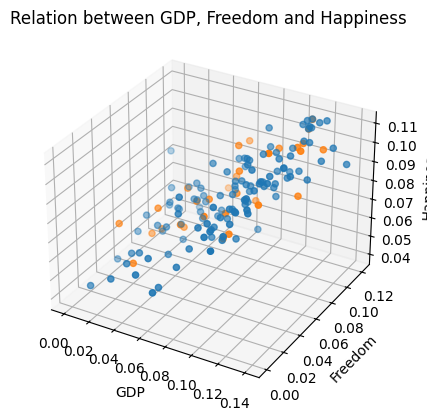

In [25]:
plotTrainingAndValidationSet2(world_happiness)

<h3>Using tool</h3>

In [26]:
def getRegressorTool2(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSet2(df_world_happiness)
    xx = [el for el in trainingInputSet]

    regressor = LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor

def plotToolRegressor2(df_world_happiness):
    # Get training data and trained regressor
    trainingInputSet, trainingOutputSet, validationInputValues, validationOutputValues = getTrainingAndValidationSet2(df_world_happiness)
    trainingInputSet = np.array(trainingInputSet)  # Convert to NumPy array
    regressor = getRegressorTool2(df_world_happiness)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    
    print("f(x) = {} + {}*x1 + {}*x2".format(w0,w1,w2))

    computedOutputValues = regressor.predict(validationInputValues)
    err = getErrors(computedOutputValues, validationOutputValues)
    print("Eroare: {}".format(err))


    # Generate points for the plane
    x_min, x_max = np.min(trainingInputSet[:, 0]), np.max(trainingInputSet[:, 0])
    y_min, y_max = np.min(trainingInputSet[:, 1]), np.max(trainingInputSet[:, 1])
    x_values = np.linspace(x_min, x_max, 1000)
    y_values = np.linspace(y_min, y_max, 1000)
    x_values, y_values = np.meshgrid(x_values, y_values)
    z_values = w0 + w1 * x_values + w2 * y_values

    # Plot the data points and the model plane
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(trainingInputSet[:, 0], trainingInputSet[:, 1], trainingOutputSet, c='b', marker='o', label='Training Data')
    ax.plot_surface(x_values, y_values, z_values, alpha=0.5, cmap='viridis', label='Model Plane')

    # ax.set_xlim(x_min,x_max)
    # ax.set_ylim(y_min,y_max)
    # print(np.min(z_values), np.max(z_values))
    # ax.set_zlim(-1,1)

    # Set labels and title
    ax.set_title('Training Data and Model Plane')
    ax.set_xlabel('GDP')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    
    # Add legend
    ax.legend()

    plt.show()


f(x) = 0.03860183090262594 + 0.36541392932759154*x1 + 0.18021019882604156*x2
Eroare: 9.465415805672351e-07


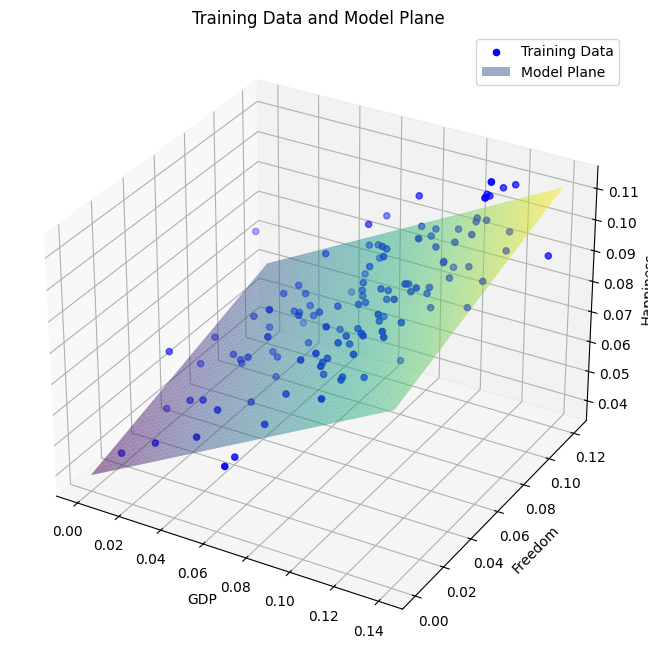

In [27]:
plotToolRegressor2(world_happiness)

<h3>Using my regressor</h3>

In [28]:
def getMyRegressor2(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSet2(df_world_happiness)
    xx = [el for el in trainingInputSet]

    regressor = LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor

def plotMyRegressor2(df_world_happiness):
    # Get training data and trained regressor
    trainingInputSet, trainingOutputSet, validationInputValues, validationOutputValues = getTrainingAndValidationSet2(df_world_happiness)
    trainingInputSet = np.array(trainingInputSet)  # Convert to NumPy array
    regressor = getMyRegressor2(df_world_happiness)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    
    print("f(x) = {} + {}*x1 + {}*x2".format(w0,w1,w2))

    computedOutputValues = regressor.predict(validationInputValues)
    err = getErrors(computedOutputValues, validationOutputValues)
    print("Eroare: {}".format(err))

    # Generate points for the plane
    x_min, x_max = np.min(trainingInputSet[:, 0]), np.max(trainingInputSet[:, 0])
    y_min, y_max = np.min(trainingInputSet[:, 1]), np.max(trainingInputSet[:, 1])
    x_values = np.linspace(x_min, x_max, 1000)
    y_values = np.linspace(y_min, y_max, 1000)
    x_values, y_values = np.meshgrid(x_values, y_values)
    z_values = w0 + w1 * x_values + w2 * y_values

    # Plot the data points and the model plane
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(trainingInputSet[:, 0], trainingInputSet[:, 1], trainingOutputSet, c='b', marker='o', label='Training Data')
    ax.plot_surface(x_values, y_values, z_values, alpha=0.5, cmap='viridis', label='Model Plane')

    # ax.set_xlim(x_min,x_max)
    # ax.set_ylim(y_min,y_max)
    # print(np.min(z_values), np.max(z_values))
    # ax.set_zlim(-1,1)

    # Set labels and title
    ax.set_title('Training Data and Model Plane')
    ax.set_xlabel('GDP')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    
    # Add legend
    ax.legend()

    plt.show()


f(x) = 0.03755586753109565 + 0.378345212714739*x1 + 0.17191080857913857*x2
Eroare: 1.4112312514573697e-06


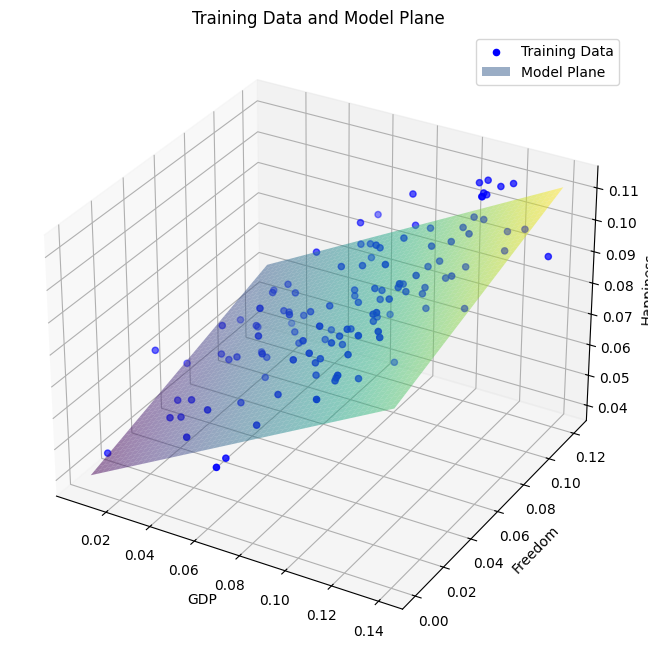

In [29]:
plotMyRegressor2(world_happiness)